<a href="https://colab.research.google.com/github/aky360/A.I./blob/main/Data%20Science/Data%20Analysis/COVID_19_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Q. 1) Show the number of Confirmed, Deaths and Recovered cases in each Region.**

**Q. 2) Remove all the records where the Confirmed Cases is Less Than 10.**

**Q. 3) In which Region, maximum number of Confirmed cases were recorded ?**

**Q. 4) In which Region, minimum number of Deaths cases were recorded ?**

**Q. 5) How many Confirmed, Deaths & Recovered cases were reported from India till 29 April 2020 ?**

**Q. 6-A ) Sort the entire data wrt No. of Confirmed cases in ascending order.**

**Q. 6-B ) Sort the entire data wrt No. of Recovered cases in descending order.**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
url = "https://raw.githubusercontent.com/aky360/A.I./main/Data%20Science/Data%20Analysis/Datasets/4.%20covid_19_data.csv"
df = pd.read_csv(url)
df.head()

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7


In [ ]:
print(df.shape)
print(df.size)
print(df.index)
print(df.columns)
print(df.columns.size)
print(df.dtypes)

(321, 6)
1926
RangeIndex(start=0, stop=321, step=1)
Index(['Date', 'State', 'Region', 'Confirmed', 'Deaths', 'Recovered'], dtype='object')
6
Date         object
State        object
Region       object
Confirmed     int64
Deaths        int64
Recovered     int64
dtype: object


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Confirmed,321.0,9949.800623,31923.853086,0.0,104.0,653.0,4655.0,299691.0
Deaths,321.0,709.152648,3236.162817,0.0,2.0,12.0,144.0,27682.0
Recovered,321.0,3030.277259,14364.870365,0.0,2.0,73.0,587.0,132929.0


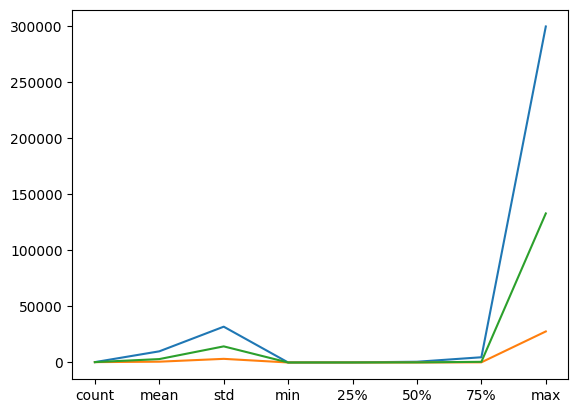

In [ ]:
plt.plot(df.describe())

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321 entries, 0 to 320
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       321 non-null    object
 1   State      140 non-null    object
 2   Region     321 non-null    object
 3   Confirmed  321 non-null    int64 
 4   Deaths     321 non-null    int64 
 5   Recovered  321 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 15.2+ KB


In [ ]:
df.isnull().sum()

Date           0
State        181
Region         0
Confirmed      0
Deaths         0
Recovered      0
dtype: int64

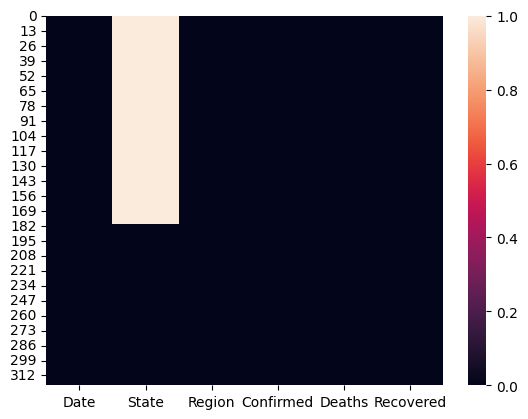

In [ ]:
sns.heatmap(df.isnull())
plt.show()

In [ ]:
df['Region'].describe()

count     321
unique    187
top        US
freq       58
Name: Region, dtype: object

**ℚ. 1) Show the number of Confirmed, Deaths and Recovered cases in each Region.**

---

In [ ]:
df.groupby('Region').sum()

<ipython-input-10-5399a630243a>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Region').sum()


,Confirmed,Deaths,Recovered
Region,,,
Afghanistan,1939,60,252
Albania,766,30,455
Algeria,3848,444,1702
Andorra,743,42,423
Angola,27,2,7
...,...,...,...
West Bank and Gaza,344,2,71
Western Sahara,6,0,5
Yemen,6,0,1


In [ ]:
df.groupby('Region')['Confirmed'].sum().sort_values(ascending=False).head(10)

Region
US                1039909
Spain              236899
Italy              203591
France             166543
UK                 166441
Germany            161539
Turkey             117589
Russia              99399
Iran                93657
Mainland China      82862
Name: Confirmed, dtype: int64

In [ ]:
df.groupby('Region')['Confirmed', 'Deaths', 'Recovered'].sum()

<ipython-input-12-35d0ce7fa236>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('Region')['Confirmed', 'Deaths', 'Recovered'].sum()


,Confirmed,Deaths,Recovered
Region,,,
Afghanistan,1939,60,252
Albania,766,30,455
Algeria,3848,444,1702
Andorra,743,42,423
Angola,27,2,7
...,...,...,...
West Bank and Gaza,344,2,71
Western Sahara,6,0,5
Yemen,6,0,1


**Q. 2) Remove all the records where the Confirmed Cases is Less Than 10.**

---

In [ ]:
# df[df['Confirmed'] < 10]                     # it includes all the confirmed cases values less than 10
# df[~(df['Confirmed'] < 10)]                  # it excludes all the confirmed cases values less than 10
# df = df[~(df['Confirmed'] < 10)]             # it excludes all the confirmed cases values less than 10 and assign to df with remaining values after exclusion

In [ ]:
df[df['Confirmed'] < 10]                     # it includes all the confirmed cases values less than 10

,Date,State,Region,Confirmed,Deaths,Recovered
18,4/29/2020,NaN,Bhutan,7,0,5
98,4/29/2020,NaN,MS Zaandam,9,2,0
105,4/29/2020,NaN,Mauritania,8,1,6
126,4/29/2020,NaN,Papua New Guinea,8,0,0
140,4/29/2020,NaN,Sao Tome and Principe,8,0,4
177,4/29/2020,NaN,Western Sahara,6,0,5
178,4/29/2020,NaN,Yemen,6,0,1
184,4/29/2020,Anguilla,UK,3,0,3
192,4/29/2020,"Bonaire, Sint Eustatius and Saba",Netherlands,5,0,0
194,4/29/2020,British Virgin Islands,UK,6,1,3


In [ ]:
df[~(df['Confirmed'] < 10)]                  # it excludes all the confirmed cases values less than 10

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7
...,...,...,...,...,...,...
316,4/29/2020,Wyoming,US,545,7,0
317,4/29/2020,Xinjiang,Mainland China,76,3,73
318,4/29/2020,Yukon,Canada,11,0,0
319,4/29/2020,Yunnan,Mainland China,185,2,181


In [ ]:
df = df[~(df['Confirmed'] < 10)]                 # it excludes all the confirmed cases values less than 10 and assign to df with remaining values after exclusion

**Q. 3) In which Region, maximum number of Confirmed cases were recorded ?**

---

In [ ]:
df.groupby('Region')['Confirmed'].sum().sort_values(ascending=False).head(10)

Region
US                1039909
Spain              236899
Italy              203591
France             166536
UK                 166432
Germany            161539
Turkey             117589
Russia              99399
Iran                93657
Mainland China      82861
Name: Confirmed, dtype: int64

**Q. 4) In which Region, minimum number of Deaths cases were recorded ?**

---

In [ ]:
df.groupby('Region')['Deaths'].sum().sort_values(ascending=True).head(50)

Region
Cambodia                            0
Seychelles                          0
Saint Lucia                         0
Central African Republic            0
Saint Kitts and Nevis               0
South Sudan                         0
Rwanda                              0
Grenada                             0
Macau                               0
Madagascar                          0
Nepal                               0
Namibia                             0
Saint Vincent and the Grenadines    0
Mozambique                          0
Holy See                            0
Timor-Leste                         0
Mongolia                            0
Uganda                              0
Laos                                0
Eritrea                             0
Vietnam                             0
Fiji                                0
Dominica                            0
Gambia                              1
Equatorial Guinea                   1
Eswatini                            1
Cabo 

In [ ]:
df.groupby('Region')['Deaths'].sum().sort_values(ascending=True).head(50) != 0
df.groupby('Region')['Deaths'].sum().sort_values(ascending=True).head(50) > 0
df.groupby('Region')['Deaths'].sum().sort_values(ascending=True).head(50) > 1

Region
Cambodia                            False
Seychelles                          False
Saint Lucia                         False
Central African Republic            False
Saint Kitts and Nevis               False
South Sudan                         False
Rwanda                              False
Grenada                             False
Macau                               False
Madagascar                          False
Nepal                               False
Namibia                             False
Saint Vincent and the Grenadines    False
Mozambique                          False
Holy See                            False
Timor-Leste                         False
Mongolia                            False
Uganda                              False
Laos                                False
Eritrea                             False
Vietnam                             False
Fiji                                False
Dominica                            False
Gambia                     

**Q. 5) How many Confirmed, Deaths & Recovered cases were reported from India till 29 April 2020 ?**

---

In [ ]:
df.groupby(df['Region'] == 'India').sum()

<ipython-input-20-021ae84a9629>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(df['Region'] == 'India').sum()


,Confirmed,Deaths,Recovered
Region,,,
False,3160745,226554,823201
True,33062,1079,8437


In [ ]:
df[df['Region'] == 'India']

,Date,State,Region,Confirmed,Deaths,Recovered
74,4/29/2020,NaN,India,33062,1079,8437


**Q. 6-A ) Sort the entire data wrt No. of Confirmed cases in ascending order.**

---

In [ ]:
df.sort_values(by=['Confirmed'], ascending=True)

,Date,State,Region,Confirmed,Deaths,Recovered
156,4/29/2020,NaN,Suriname,10,1,8
70,4/29/2020,NaN,Holy See,10,0,2
59,4/29/2020,NaN,Gambia,10,1,8
318,4/29/2020,Yukon,Canada,11,0,0
217,4/29/2020,Greenland,Denmark,11,0,11
...,...,...,...,...,...,...
57,4/29/2020,NaN,France,165093,24087,48228
168,4/29/2020,NaN,UK,165221,26097,0
80,4/29/2020,NaN,Italy,203591,27682,71252
153,4/29/2020,NaN,Spain,236899,24275,132929


**Q. 6-B ) Sort the entire data wrt No. of Recovered cases in descending order.**

---

In [ ]:
df.sort_values(by=['Recovered'], ascending=False)

,Date,State,Region,Confirmed,Deaths,Recovered
153,4/29/2020,NaN,Spain,236899,24275,132929
61,4/29/2020,NaN,Germany,161539,6467,120400
76,4/29/2020,NaN,Iran,93657,5957,73791
80,4/29/2020,NaN,Italy,203591,27682,71252
229,4/29/2020,Hubei,Mainland China,68128,4512,63616
...,...,...,...,...,...,...
258,4/29/2020,Nevada,US,4934,230,0
257,4/29/2020,Nebraska,US,3851,56,0
255,4/29/2020,Montana,US,451,16,0
254,4/29/2020,Missouri,US,7660,338,0
